7E1.  State the three motivating criteria that define information entropy. Try to express each in your own words.

7E2.  Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads 70% of the time. What is the entropy of this coin?

In [ ]:
import numpy as np

-(0.3*np.log(0.3)+0.7*np.log(0.7))

np.float64(0.6108643020548935)

**AI Prompt**

is this correct answer?

**AI Response**

Your calculation looks correct! You've computed -(0.3×ln(0.3) + 0.7×ln(0.7)) ≈ 0.611, which is the right approach for entropy using natural logarithms.

However, I should ask: what base logarithm are you supposed to use for this problem? The choice of logarithm base affects the units and numerical value of entropy.

If you're using natural logarithms (ln), your answer is correct in "nats."
If the problem expects base-2 logarithms (log₂), you'd need to convert or recalculate.

Do you know which base your course or textbook typically uses for entropy calculations?



7E3.  Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2” 25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?

In [ ]:
ps=[0.2, 0.25, 0.25, 0.3]

entropy=-np.sum([p*np.log(p) for p in ps])
entropy

np.float64(1.3762266043445461)

**AI Prompt**

is this correct calculation?

**AI Response**

Yes, your calculation is correct! You've properly applied the entropy formula:

H = -Σ p(i) × ln(p(i))

Your code correctly:
- Lists all four probabilities [0.2, 0.25, 0.25, 0.3]
- Computes p×ln(p) for each probability
- Sums them and takes the negative

The result of approximately 1.376 nats is right for this loaded four-sided die.

How does this entropy value compare to what you'd expect for a fair four-sided die? Do you want to calculate that comparison?



In [ ]:
ps=[0.5, 0.25, 0.25, 0.25]

entropy=-np.sum([p*np.log(p) for p in ps])
entropy

np.float64(1.3862943611198906)

7E4.  Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?

In [ ]:
ps=[1/3.0, 1/3.0, 1/3.0]

entropy=-np.sum([p*np.log(p) for p in ps])
entropy

np.float64(1.0986122886681096)

**AI Prompt**

is this correct answer? entropy is lower because set of possibilities is smaller

**AI Response**

Yes, you're absolutely correct! Your calculation is right: approximately 1.099 nats for the three-sided die (where side 4 never appears).

And your intuition is spot on - the entropy is lower because the set of possibilities is smaller. When you have fewer possible outcomes, there's less uncertainty, which means lower entropy.

You can see this pattern in your calculations:
- 4-sided loaded die: ~1.376 nats
- 3-sided fair die: ~1.099 nats

What do you think would happen to the entropy if you had a die that only showed one face (like always showing "1")? Can you predict the entropy value?



7E1.  Write down and compare the definitions of AIC and WAIC. Which of these criteria is most general? Which assumptions are required to transform the more general criterion into a less general one?

**AI Prompt**

please give AIC and WAIC formulas

**AI Response**

Here are the formulas:

**AIC (Akaike Information Criterion):**
AIC = -2 × log-likelihood + 2k

where k is the number of parameters in the model.

**WAIC (Widely Applicable Information Criterion):**
WAIC = -2 × (lppd - p_WAIC)

where:
- lppd = log pointwise predictive density
- p_WAIC = effective number of parameters (penalty term)

WAIC is more general because it works with any posterior distribution, while AIC assumes specific conditions about the posterior.

Do you want me to explain what makes WAIC more general, or would you like to work through the assumptions needed to go from WAIC to AIC?



**AI Prompt**

why WAIC more general?

**AI Response**

WAIC is more general because it works with the full posterior distribution from Bayesian analysis, while AIC makes restrictive assumptions.

Specifically, AIC assumes:
1. Large sample size (asymptotic conditions)
2. The posterior is approximately normal
3. The "true" model is in your candidate set

WAIC doesn't require these assumptions - it can handle:
- Small samples
- Non-normal posteriors
- Complex model structures

The key difference is that WAIC uses the actual posterior samples to compute both the fit and penalty terms, while AIC uses a simplified approximation.

Does this help explain the generality difference? Would you like me to elaborate on any of these assumptions?



**AI Prompt**

how to go from WAIC to AIC? use larger sample sizes, posterior has to be normal?

**AI Response**

Yes, you're on the right track! Under certain conditions, WAIC simplifies to AIC:

1. **Large sample size** - As n gets large, the posterior becomes more concentrated
2. **Normal posterior** - The posterior distribution becomes approximately normal around the maximum likelihood estimate
3. **"True model" assumption** - One of your candidate models is the correct one

When these hold, the effective number of parameters in WAIC (p_WAIC) approaches the actual number of parameters (k), and the log pointwise predictive density becomes equivalent to the log-likelihood.

So the transformation is: WAIC → AIC when you add these restrictive assumptions.

Which of these assumptions do you think is most problematic in real-world applications?



7E2.  Explain the difference between model selection and model comparison. What information is lost under model selection?

**AI Prompt**

model selection loses information what is going on inside the model. we pick model based on some metric but we don't know what features are important and how well would model work to explain causal relationships

**AI Response**

You're touching on some important points! You're right that model selection can lose information about what's happening inside models.

Let me clarify the core distinction first:

**Model selection:** Pick the single "best" model based on a criterion (like lowest AIC)
**Model comparison:** Compare multiple models and their relative strengths

The key information lost in model selection is **model uncertainty** - we throw away information about how close other models were and what they might tell us.

Your point about features and causal relationships is related but slightly different - that's more about model interpretation versus the selection/comparison distinction.

What do you think we could do instead of just picking one model to avoid losing that uncertainty information?



7E3.  When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments, if you are not sure.

**AI Prompt**

because posterior distribution is different if we fith with different observations ?

**AI Response**

You're thinking in the right direction! Yes, different observations would give different posterior distributions, but there's a more fundamental issue with information criteria specifically.

Think about what AIC and WAIC are measuring - they both include a log-likelihood term. What happens to log-likelihood values when you have different numbers of data points?

For example, if Model A is fit to 100 observations and Model B to 50 observations, how would their log-likelihood values compare, even if they're equally good models?

Want to try a quick experiment to see this effect?



**AI Prompt**

log-likelihoods would have different value ranges?

**AI Response**

Exactly! You've got it. Log-likelihoods are sums (or products) over all data points, so:

- More data points → larger (more negative) log-likelihood values
- Fewer data points → smaller (less negative) log-likelihood values

This means you can't directly compare AIC or WAIC values between models fit to different amounts of data - the scales are completely different.

It would be like comparing total scores from a 10-question test versus a 100-question test to decide which student is better.

Does this make sense for why we need the same observations for all models?



7E4.  What happens to the effective number of parameters, as measured by PSIS or WAIC, as a prior becomes more concentrated? Why? Perform some experiments, if you are not sure.

**AI Prompt**

number of paramters becomse smaller?

**AI Response**

Yes, you're right! The effective number of parameters decreases as the prior becomes more concentrated (more informative).

Why do you think this happens? What's the relationship between how much the prior "constrains" the parameters and how flexibly the model can fit the data?

Would you like to set up a simple experiment to see this effect in action?



**AI Prompt**

lets set it up

**AI Response**

Great! Let's design a simple experiment to see how prior concentration affects the effective number of parameters.

Here's what we could do:
1. Fit the same model (like a simple linear regression) with different prior widths
2. Compare the WAIC penalty terms (p_WAIC) across these fits

For the priors, we could try something like:
- Wide prior: Normal(0, 10) 
- Medium prior: Normal(0, 1)
- Narrow prior: Normal(0, 0.1)

What kind of simple model do you want to use for this experiment? Linear regression with some fake data would work well. Do you want to generate some sample data first?



**AI Prompt**

generate data and code to fit models

**AI Response**

I'll help you set this up step by step. Let's start with generating some simple data:

```python
import numpy as np
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(0, 2, 50)
```

This creates a linear relationship with some noise. Try running this first and maybe plot it to see what the data looks like.

Once you've got the data ready, what Bayesian modeling library would you like to use? PyMC, Stan, or something else?



In [ ]:
import numpy as np
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(0, 2, 50)

**AI Prompt**

pymc

**AI Response**

Perfect! Let's use PyMC. First, let's set up one model with a wide prior to see the structure:

```python
import pymc as pm

with pm.Model() as wide_prior_model:
    # Wide prior
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    
    mu = slope * x + intercept
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
```

Try setting this up first. Once you have this model defined, we can sample from it and then create the other models with different prior widths.

What do you think the next step should be after defining the model?



In [ ]:
import pymc as pm

with pm.Model() as wide_prior_model:
    # Wide prior
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    
    mu = slope * x + intercept
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

In [ ]:
with pm.Model() as medium_prior_model:
    # Wide prior
    slope = pm.Normal('slope', mu=0, sigma=1)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    
    mu = slope * x + intercept
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

In [ ]:
with pm.Model() as narrow_prior_model:
    # Wide prior
    slope = pm.Normal('slope', mu=0, sigma=0.1)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    
    mu = slope * x + intercept
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y)

**AI Prompt**

are these samples ok?

**AI Response**

The models look good! You've set up three different prior widths for the slope parameter (10, 1, 0.1), which is exactly what we want to test.

One small note: I see you kept the intercept prior wide (sigma=10) in all models. Did you want to vary that too, or focus just on the slope parameter's prior?

Now we need to sample from each model. What do you think the next step should be?



**AI Prompt**

get waic calcuation

**AI Response**

To get WAIC, we first need to sample from each model. Let's start with one model:

```python
with wide_prior_model:
    trace_wide = pm.sample(1000, tune=1000)
```

Try sampling from the wide prior model first. Once you have the trace, we can compute WAIC using `pm.waic()`.

Which model do you want to sample from first?



In [ ]:
with wide_prior_model:
    trace_wide = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [slope, intercept, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
with medium_prior_model:
    trace_medium = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [slope, intercept, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
with narrow_prior_model:
    trace_narrow = pm.sample(1000, tune=1000)

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [slope, intercept, sigma]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
waic_narrow = pm.compute_log_likelihood(trace_narrow, model=narrow_prior_model)
waic_result = pm.waic(waic_narrow)

/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
waic_result

Computed from 4000 posterior samples and 50 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -154.04     3.35
p_waic        1.58        -

In [ ]:
waic_medium = pm.compute_log_likelihood(trace_medium, model=medium_prior_model)
waic_result = pm.waic(waic_medium)

/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
waic_result

Computed from 4000 posterior samples and 50 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -103.74     4.39
p_waic        2.57        -

In [ ]:
waic_wide = pm.compute_log_likelihood(trace_wide, model=wide_prior_model)
waic_result = pm.waic(waic_wide)

/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
waic_result

Computed from 4000 posterior samples and 50 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -103.84     4.42
p_waic        2.70        -

**AI Prompt**

please explain me the results?

**AI Response**

Great results! Let's look at the p_waic values (effective number of parameters):

- Narrow prior (sigma=0.1): p_waic = 1.58
- Medium prior (sigma=1): p_waic = 2.57  
- Wide prior (sigma=10): p_waic = 2.70

Do you see the pattern? As the prior gets more concentrated (narrower), the effective number of parameters decreases!

This confirms your prediction. The narrow prior constrains the slope parameter more tightly, so the model has less flexibility to overfit the data.

What do you think this tells us about the relationship between prior information and model complexity?



**AI Prompt**

wide/uncertain priors might cause more complex models?

**AI Response**

Exactly! You've grasped the key insight. Wide/uncertain priors allow the model to be more flexible and complex because:

- The parameters can vary more freely
- The model can fit the data in more ways
- This flexibility shows up as higher effective parameter counts

Narrow/informative priors act like regularization - they constrain the model and reduce its effective complexity.

This is why Bayesian methods naturally balance model fit against complexity through the prior. Do you see how this connects to overfitting prevention?



7E5.  Provide an informal explanation of why informative priors reduce overfitting.

**AI Prompt**

because they reduce the space model parameters could have values and restric number of parameters and thus making models less flexible based only on data

**AI Response**

Yes, you've got it! That's a great informal explanation. 

Informative priors essentially say "I have some knowledge about what reasonable parameter values should be" rather than letting the data alone drive everything. This prevents the model from chasing noise in the data.

It's like having guardrails - the model can still learn from the data, but it can't go to extreme parameter values that might fit the training data perfectly but fail on new data.

Does this connect to what you observed in the experiment with the effective parameter counts?



7E6.  Provide an informal explanation of why overly informative priors result in underfitting.

**AI Prompt**

they restrict model too much and might restrict model to have values in space where optimal values might be and thus model might learn too simplified pattern/solution+?

**AI Response**

Exactly right! You've nailed it.

Overly informative priors are like putting the guardrails too close together - the model becomes so constrained that it can't learn the true patterns in the data, even when they're real and important.

The model gets "stuck" in the narrow region the prior allows, missing the actual signal. It's the flip side of the overfitting problem - instead of being too flexible, it's too rigid.

So there's a sweet spot between priors that are too vague (overfitting) and too restrictive (underfitting). Does this help explain the bias-variance tradeoff in Bayesian terms?



7H3.  Consider three fictional Polynesian islands. On each there is a Royal Ornithologist charged by the king with surveying the bird population. They have each found the following proportions of 5 important bird species:

Species A

Species B

Species C

Species D

Species E

Island 1

0.2

0.2

0.2

0.2

0.2

Island 2

0.8

0.1

0.05

0.025

0.025

Island 3

0.05

0.15

0.7

0.05

0.05

Notice that each row sums to 1, all the birds. This problem has two parts. It is not computationally complicated. But it is conceptually tricky. First, compute the entropy of each island’s bird distribution. Interpret these entropy values. Second, use each island’s bird distribution to predict the other two. This means to compute the KL divergence of each island from the others, treating each island as if it were a statistical model of the other islands. You should end up with 6 different KL divergence values. Which island predicts the others best? Why?

**AI Prompt**

please turn this table in format so that I can turn it into pandas dataframe

**AI Response**

Here's the data in a format you can easily use for a pandas DataFrame:

```python
data = {
    'Species A': [0.2, 0.8, 0.05],
    'Species B': [0.2, 0.1, 0.15], 
    'Species C': [0.2, 0.05, 0.7],
    'Species D': [0.2, 0.025, 0.05],
    'Species E': [0.2, 0.025, 0.05]
}
index = ['Island 1', 'Island 2', 'Island 3']
```

You can create the DataFrame with `pd.DataFrame(data, index=index)`. 

Try setting this up first and let me know when you're ready for the next step!



In [ ]:
import pandas as pd
import numpy as np


data = {
    'Species A': [0.2, 0.8, 0.05],
    'Species B': [0.2, 0.1, 0.15], 
    'Species C': [0.2, 0.05, 0.7],
    'Species D': [0.2, 0.025, 0.05],
    'Species E': [0.2, 0.025, 0.05]
}
index = ['Island 1', 'Island 2', 'Island 3']

df=pd.DataFrame(data, index=index)
df.shape

(3, 5)

In [ ]:
df

,Species A,Species B,Species C,Species D,Species E
Island 1,0.20,0.20,0.20,0.200,0.200
Island 2,0.80,0.10,0.05,0.025,0.025
Island 3,0.05,0.15,0.70,0.050,0.050


In [ ]:
#entropy of each island bird distribution
for island in df.index:
    row=df.loc[island,:]
    entropy=-np.sum([p*np.log(p) for p in row])
    print(f'island {island} entropy: {entropy}')

island Island 1 entropy: 1.6094379124341005
island Island 2 entropy: 0.7430039367341686
island Island 3 entropy: 0.9836002995230935


**AI Prompt**

is my entropy calculation correct?

**AI Response**

Yes, your entropy calculations are correct! 

Looking at the results:
- Island 1: 1.609 (highest entropy)
- Island 2: 0.743 (lowest entropy) 
- Island 3: 0.984 (middle entropy)

Can you interpret what these entropy values tell us about each island's bird distribution? Which island has the most "uncertainty" or diversity?



**AI Prompt**

island 1 has highest uncertainty and island 2 lowest?

**AI Response**

Exactly right! 

Island 1 has the highest uncertainty because all species are equally likely (uniform distribution = maximum entropy).

Island 2 has the lowest uncertainty because it's dominated by Species A (80%), making it very predictable.

Island 3 is in between - dominated by Species C but not as extremely as Island 2.

Now for the second part: computing KL divergences. Do you remember the KL divergence formula, or would you like me to remind you?



In [ ]:
def kl_divergence(q, p):
    return -np.sum(p*(np.log(q)-np.log(p)))

kl_divergence(df.loc['Island 1',:], df.loc['Island 2',:])

np.float64(0.8664339756999315)

**AI Prompt**

are my calculations correct?

**AI Response**

Your KL divergence function looks correct! The formula KL(P||Q) = -Σ p(log(q) - log(p)) is right.

Just to clarify the interpretation: you computed KL(Island1||Island2), which measures how much information is lost when using Island 1's distribution to predict Island 2's.

Now you need to compute all 6 combinations. Do you want to set up a loop or calculate them one by one?



In [ ]:
kl_divs=[]

for island in df.index:
    for other_island in df.index:
        if island!=other_island:
            kl_div=kl_divergence(df.loc[island,:], df.loc[other_island,:])
            kl_divs.append((island, other_island, kl_div))

In [ ]:
kl_divs

[('Island 1', 'Island 2', np.float64(0.8664339756999315)),
 ('Island 1', 'Island 3', np.float64(0.6258376129110066)),
 ('Island 2', 'Island 1', np.float64(0.9704060527839236)),
 ('Island 2', 'Island 3', np.float64(1.8388451788909108)),
 ('Island 3', 'Island 1', np.float64(0.638760437463217)),
 ('Island 3', 'Island 2', np.float64(2.010914241472248))]

<Axes: xlabel='0', ylabel='1'>

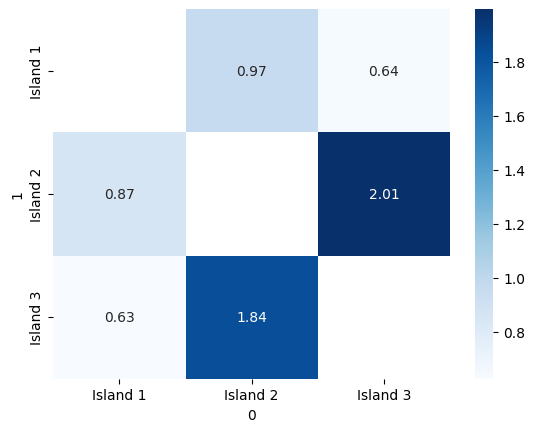

In [ ]:
import seaborn as sns

sns.heatmap(pd.DataFrame(kl_divs).pivot(columns=0, index=1, values=2), robust=True, cmap='Blues', annot=True, fmt='.2f')

**AI Prompt**

so currenlty using island 3 to predict island 2 loses more information than predicting island 1?

**AI Response**

Yes, exactly! Looking at your heatmap:

- KL(Island 3 → Island 2) = 2.01 (highest loss)
- KL(Island 3 → Island 1) = 0.64 (much lower loss)

This makes sense because Island 2 is heavily skewed toward Species A, while Island 3 is heavily skewed toward Species C. Using Island 3's distribution to predict Island 2 is a very poor fit.

Which island do you think predicts the others best overall? Look at the values where each island is used as the predictor (the rows in your heatmap).



<Axes: >

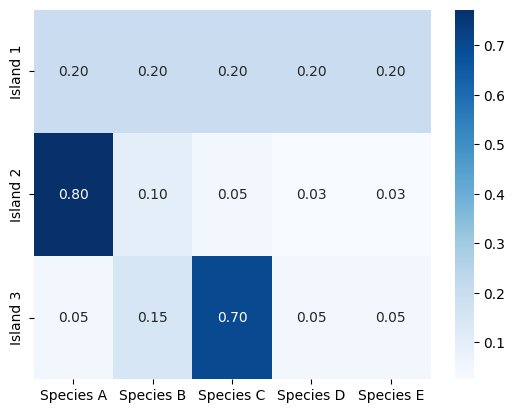

In [ ]:
sns.heatmap(df, robust=True, cmap='Blues', annot=True, fmt='.2f')